In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

# Imports, Load CSV


In [92]:
df1 = pd.read_csv('capstonewrangled.csv', index_col=0, low_memory=False)
warnings.filterwarnings('ignore')

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df1.columns.to_list()

['Accident_Index',
 '1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Accident_Severity',
 'Carriageway_Hazards',
 'Date',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year_x',
 'InScotland',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Driver_Home_Area_Type',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Skidding_and_Overturning',
 '

There are certain categories that are not able be used as predictors/features for the purpose of this project. For this project, I am attempting to look at variable/features that are available prior to the accident, and thus could be predictive of the future severity of new accidents. While the dataset contains tons of valuable information on location as well, the purpose is to not use the future generated model to generalize by location either, so all variables that have location, or are a proxy for location, will be removed. 

In [4]:
ls = ['Did_Police_Officer_Attend_Scene_of_Accident',#Post incident
      'Number_of_Casualties',#A possible other target variable, but at this time not being investigate.Post-incident variable
      'Hit_Object_in_Carriageway',#Post incident
      'Hit_Object_off_Carriageway',#Post incident
      'Skidding_and_Overturning',#Post incident
      'X1st_Point_of_Impact',#Post incident
      'Carriageway_Hazards',#Post incident
      'Police_Force',#Location based
      "InScotland",#Location based
      'Local_Authority_(District)',#Location based
      'Local_Authority_(Highway)',#Location based
      'Driver_Home_Area_Type',#rural or urban etc. Location based
      "Driver_IMD_Decile",#location based - a calculated score
      'Number_of_Vehicles',#Post incident
      'Year_x',#duplicate year from Merge
      '1st_Road_Number',#irrelevant - location based
      '2nd_Road_Number', #irrelevant - location based
      'Latitude', #location based
      'Longitude',#location based
      "Year_y",#duplicate found in date
      'Urban_or_Rural_Area'#location based
     ]

In [5]:
#drop all of the above columns
df = df1.drop(ls, axis=1)

In [6]:
#Select at numeric features and run pairplot to explore
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf

,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Vehicle_Reference
0,0.0,5.0,30.0,3.0,8268.0,0.0,1
1,0.0,0.0,30.0,5.0,8300.0,0.0,1
2,0.0,0.0,30.0,4.0,1769.0,0.0,1
3,0.0,0.0,30.0,10.0,85.0,0.0,1
4,0.0,0.0,30.0,1.0,2976.0,0.0,1
...,...,...,...,...,...,...,...
2058403,0.0,0.0,60.0,14.0,1598.0,0.0,1
2058404,0.0,0.0,60.0,1.0,1598.0,0.0,2
2058405,0.0,0.0,70.0,1.0,1598.0,0.0,1
2058406,0.0,0.0,40.0,13.0,1796.0,0.0,1


Distributions of Numerical Features


array([[<AxesSubplot:title={'center':'Pedestrian_Crossing-Human_Control'}>,
        <AxesSubplot:title={'center':'Pedestrian_Crossing-Physical_Facilities'}>,
        <AxesSubplot:title={'center':'Speed_limit'}>],
       [<AxesSubplot:title={'center':'Age_of_Vehicle'}>,
        <AxesSubplot:title={'center':'Engine_Capacity_.CC.'}>,
        <AxesSubplot:title={'center':'Vehicle_Location.Restricted_Lane'}>],
       [<AxesSubplot:title={'center':'Vehicle_Reference'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

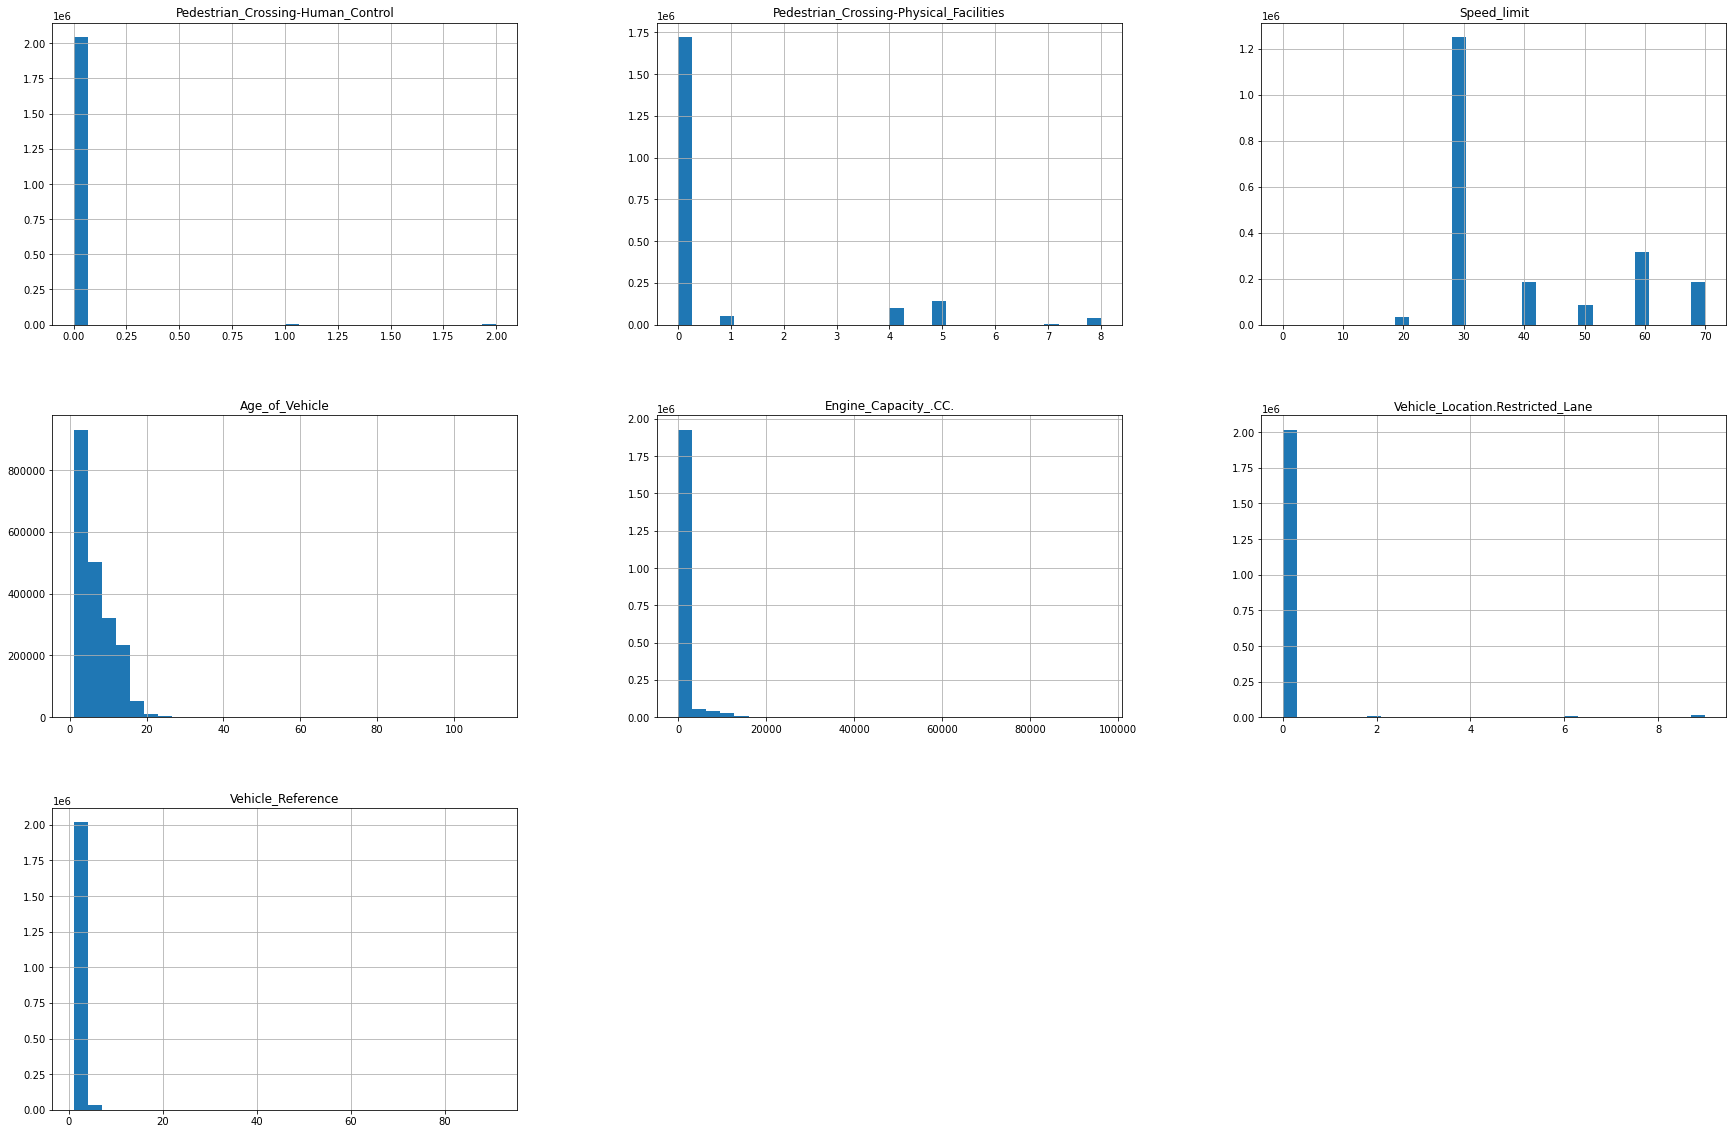

In [7]:


numdf.hist(bins=30, figsize =(30,20))

# seeing distributions, remove location variables


In [8]:
#duplicate and location based columsn removed
df.head(1)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Pedestrian_Crossing-Human_Control,...,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,200501BS00002,B,C,Slight,2005-01-05,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,0.0,...,MISSING,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No


In [9]:
#numdf = df.select_dtypes(include=['float64', 'int64'])
#numdf.hist(bins=30, figsize =(30,15))

In [10]:
# remove columns that are post-accident and impossible to be predictive of  "Did police officer attend", "Number of casualties",
#df = df.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Number_of_Casualties'], axis = 1)
#df = df.drop(['Date', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway', 'Skidding_and_Overturning','X1st_Point_of_Impact'], axis = 1)
#df= df.drop(['Carriageway_Hazards'], axis=1)
#df= df.drop(['Police_Force', "InScotland", 'Local_Authority_(District)','Local_Authority_(Highway)', 'Driver_Home_Area_Type', "Driver_IMD_Decile", 'Number_of_Vehicles'], axis=1)

Looking at Categorical Features

In [11]:
catdf = df.select_dtypes(include=['object'])

In [12]:
catdf.head(2)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,...,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,200501BS00002,B,C,Slight,2005-01-05,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,Dry,...,Leaving roundabout,DENNIS,MISSING,Heavy oil,Male,No tow/articulation,Did not leave carriageway,Slowing or stopping,Bus or coach (17 or more pass seats),No
1,200501BS00003,C,Unclassified,Slight,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,Dry,...,Not at or within 20 metres of junction,DENNIS,MISSING,Heavy oil,Male,No tow/articulation,Did not leave carriageway,Going ahead right-hand bend,Bus or coach (17 or more pass seats),No


In [13]:
catlist =  catdf.columns.to_list()
catlist

['Accident_Index',
 '1st_Road_Class',
 '2nd_Road_Class',
 'Accident_Severity',
 'Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Weather_Conditions',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive']

In [25]:
df['Datetime'] = df.Date +" "+ df.Time
df['Datetime'] = pd.to_datetime(df.Datetime, infer_datetime_format=True)




17    188639
16    171826
15    157704
8     153515
18    141788
14    131220
13    130456
12    127418
11    113168
9     106392
19    101539
10     98016
7      92111
20     71819
21     55747
22     47699
6      37384
23     35863
0      25211
1      18021
5      15470
2      13684
3      11604
4       9583
Name: Datetime, dtype: int64

Text(0, 0.5, 'Total Count')

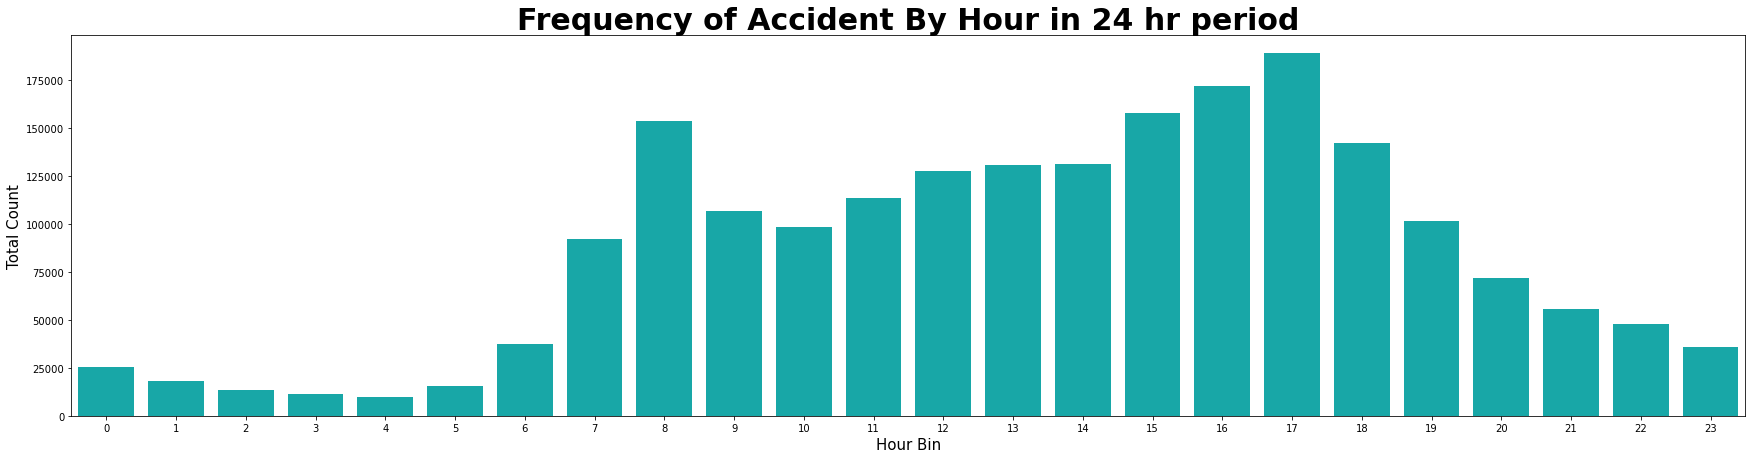

In [78]:



countplt, ax = plt.subplots(figsize = (30,7))
ax = sns.countplot(x=df.Datetime.dt.hour, data=df, color="c")
ax.set_title('Frequency of Accident By Hour in 24 hr period',fontsize = 30, fontweight='bold' )
ax.set_xlabel('Hour Bin', fontsize = 15)
ax.set_ylabel('Total Count', fontsize = 15)


In [57]:
fatalsubset = df[df.Accident_Severity=='Fatal']
fatalsubset.head(2)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Pedestrian_Crossing-Human_Control,...,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,Datetime
507,200501CP00085,A,C,Fatal,2005-05-18,Wednesday,Give way or uncontrolled,T or staggered junction,Daylight,0.0,...,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle over 500cc,No,2005-05-18 18:30:00
9153,200501RY10515,C,A,Fatal,2005-11-09,Wednesday,Auto traffic signal,T or staggered junction,Daylight,0.0,...,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Bus or coach (17 or more pass seats),No,2005-11-09 09:20:00


Text(0, 0.5, 'Total Count')

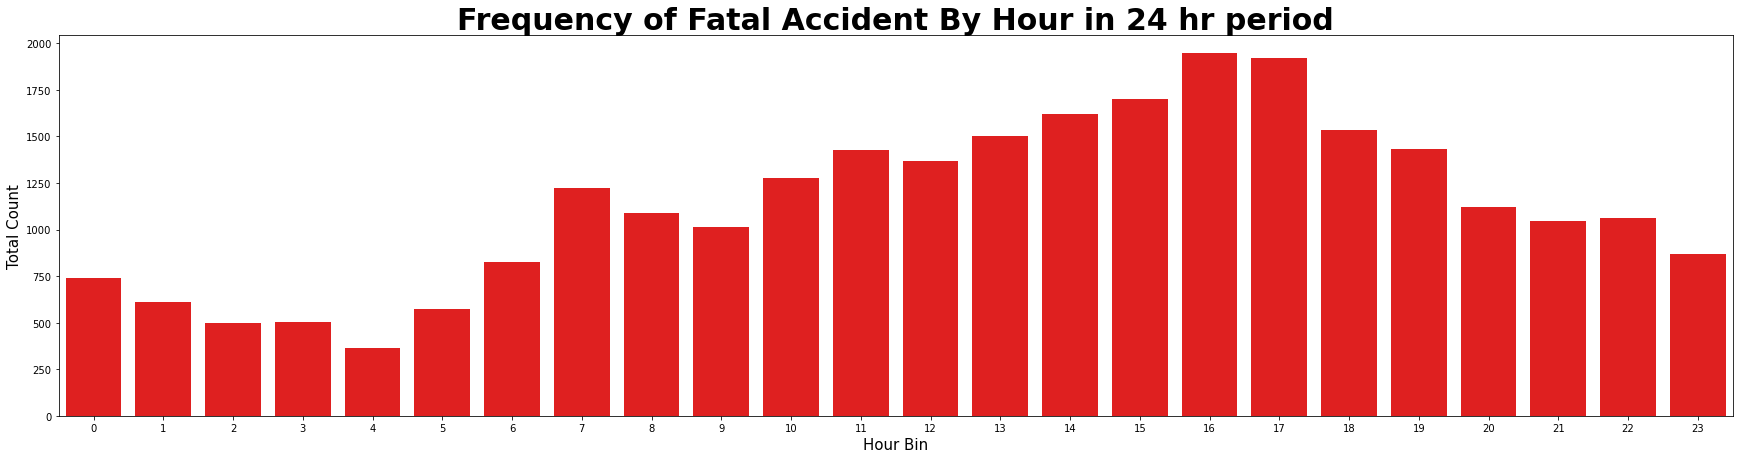

In [79]:

countplt, ax = plt.subplots(figsize = (30,7))
ax = sns.countplot(x=fatalsubset.Datetime.dt.hour, data=df, color="r")
ax.set_title('Frequency of Fatal Accident By Hour in 24 hr period',fontsize = 30, fontweight='bold' )
ax.set_xlabel('Hour Bin', fontsize = 15)
ax.set_ylabel('Total Count', fontsize = 15)


Text(0.5, 0.98, 'Sex of Driver')

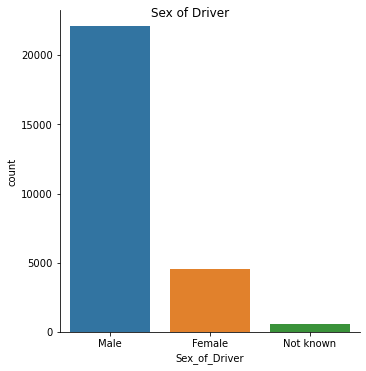

In [91]:
g= sns.catplot(x='Sex_of_Driver', data=fatalsubset, kind='count')
g.fig.suptitle('Sex of Driver')

Text(0.5, 0.98, 'Type of Vehicle')

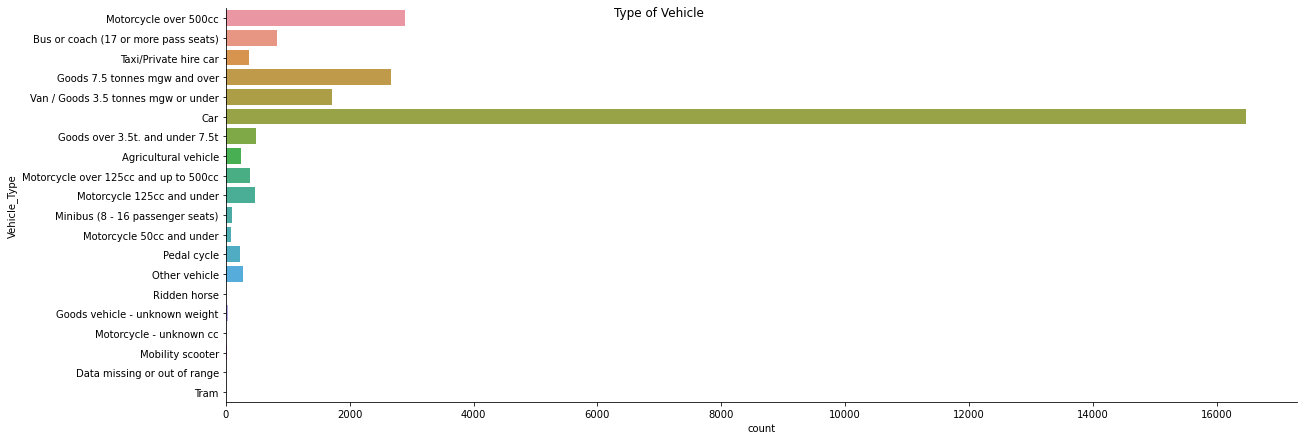

In [84]:
g= sns.catplot(y='Vehicle_Type', data= fatalsubset, kind='count', height =6, aspect=3)
g.fig.suptitle('Type of Vehicle')

Text(0.5, 0.98, 'Road Class of 1st Vehicle')

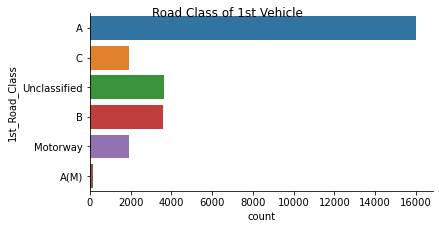

In [87]:
g= sns.catplot(y='1st_Road_Class', data=fatalsubset, kind='count', height =3, aspect =2)
g.fig.suptitle('Road Class of 1st Vehicle')

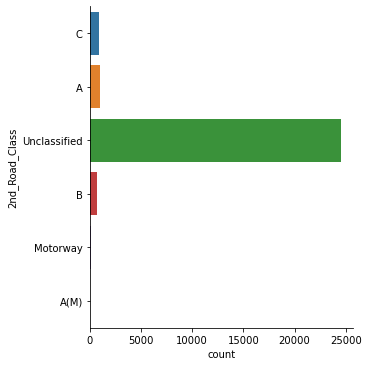

In [77]:
sns.catplot(y='2nd_Road_Class', data=fatalsubset, kind='count')